In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading & Checking the Dataset


In [ ]:
df = pd.read_csv('/content/drive/My Drive/counselchat-data.csv')

In [ ]:
df.head(3)

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0


In [ ]:
df.tail(3)

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
1479,5796a111bc069dff6a5339ca,What are the long term effects of losing one's...,The birth mother attempted suicide several tim...,https://counselchat.com/questions/what-are-the...,"Family Conflict,Parenting,Children & Adolescents","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,"<p>The true answer is, ""no one can really say ...",0
1480,5795952cbc069dff6a5339aa,How do I help my 20 year old boyfriend who say...,I think adult life is making him depressed and...,https://counselchat.com/questions/how-do-i-hel...,"Relationships,Depression,Substance Abuse","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>How do you help yourself to believe you req...,0
1481,5773e438b9ff751f196e8df0,I'm worried about my new job.,I just took a job that requires me to travel f...,https://counselchat.com/questions/i-m-worried-...,"Anxiety,Career Counseling",Philip Kolba,https://counselchat.com/therapists/philip-kolba,<p>hmm this is a tough one!</p>,0


In [ ]:
df.shape


(1482, 9)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   questionID     1482 non-null   object
 1   questionTitle  1480 non-null   object
 2   questionText   1383 non-null   object
 3   questionUrl    1482 non-null   object
 4   topics         1472 non-null   object
 5   therapistName  1482 non-null   object
 6   therapistUrl   1482 non-null   object
 7   answerText     1482 non-null   object
 8   upvotes        1482 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 104.3+ KB


In [ ]:
df.describe(include='all') 


,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
count,1472,1472,1376,1472,1472,1472,1472,1472,1472.0
unique,773,768,713,773,288,157,158,1469,NaN
top,579e400d188cd61c1684e835,Is it normal to go into therapy feeling nervous?,I've gone to a couple therapy sessions so far ...,https://counselchat.com/questions/is-it-normal...,Relationships,"Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p><br></p>,NaN
freq,22,22,22,22,116,273,273,4,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Cheking missing values


In [ ]:
df.isnull().sum()

questionID        0
questionTitle     2
questionText     99
questionUrl       0
topics           10
therapistName     0
therapistUrl      0
answerText        0
upvotes           0
dtype: int64

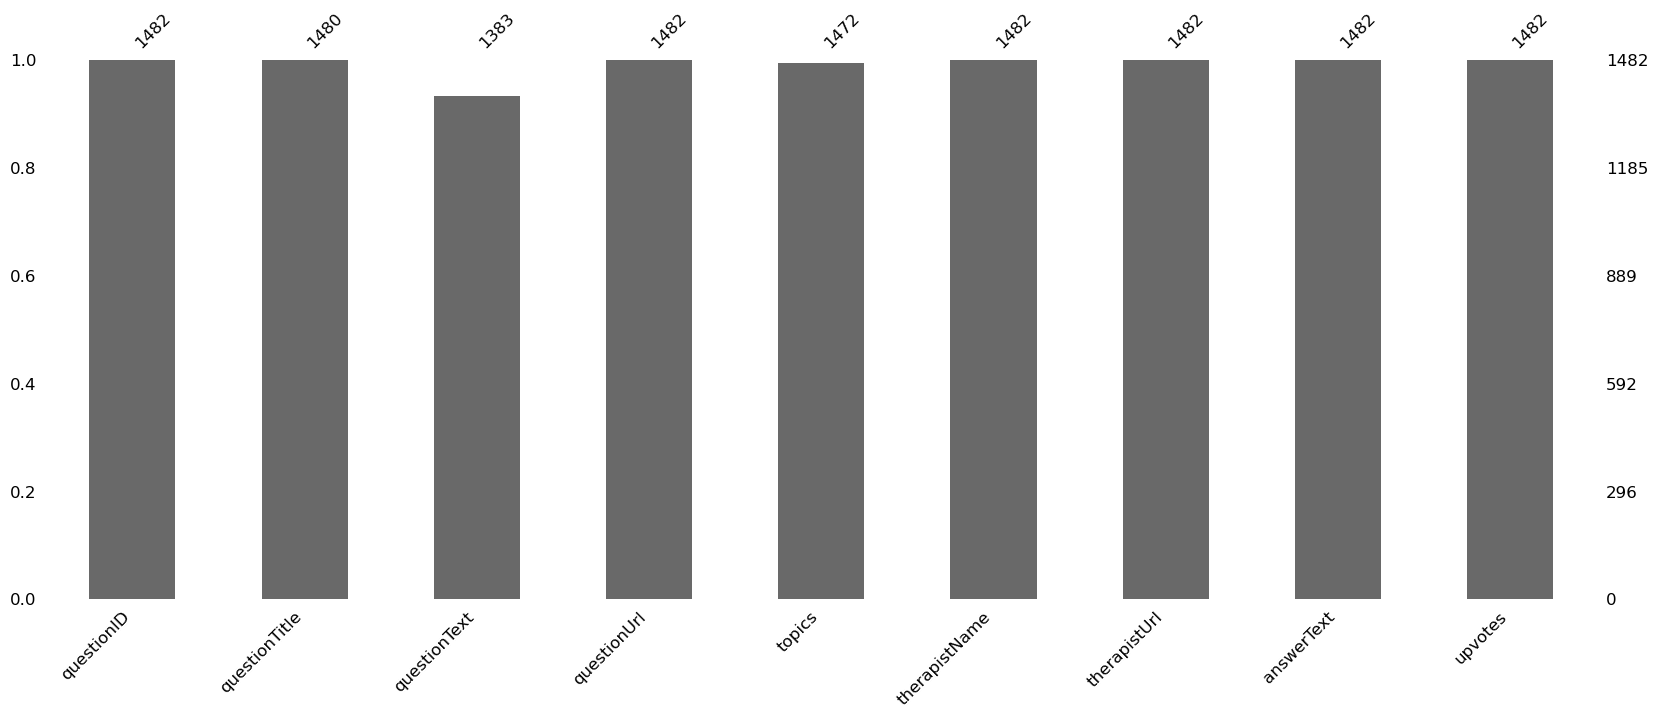

In [ ]:
msno.bar(df, figsize=(20, 7), fontsize=12);


In [ ]:
# create a dataframe with null values 
null_columns = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0], columns=['Percentage of NaN values'])
null_columns['Total_NaN_Values'] = df[df.columns[df.isnull().any()]].isnull().sum()
null_columns

,Percentage of NaN values,Total_NaN_Values
questionTitle,0.134953,2
questionText,6.680162,99
topics,0.674764,10


<AxesSubplot:>

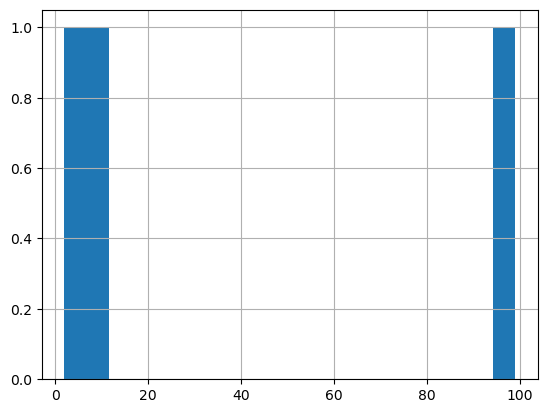

In [ ]:
null_columns.Total_NaN_Values.hist(bins=20)

In [ ]:
#drop nan values less than 5%
df.dropna(subset=['questionTitle'], how='all', inplace=True)
df.dropna(subset=['topics'], how='all', inplace=True)


In [ ]:
df.isnull().sum()

questionID        0
questionTitle     0
questionText     96
questionUrl       0
topics            0
therapistName     0
therapistUrl      0
answerText        0
upvotes           0
dtype: int64

In [ ]:
df.nunique()

questionID        773
questionTitle     768
questionText      713
questionUrl       773
topics            288
therapistName     157
therapistUrl      158
answerText       1469
upvotes             1
dtype: int64

<AxesSubplot:xlabel='uniques', ylabel='features'>

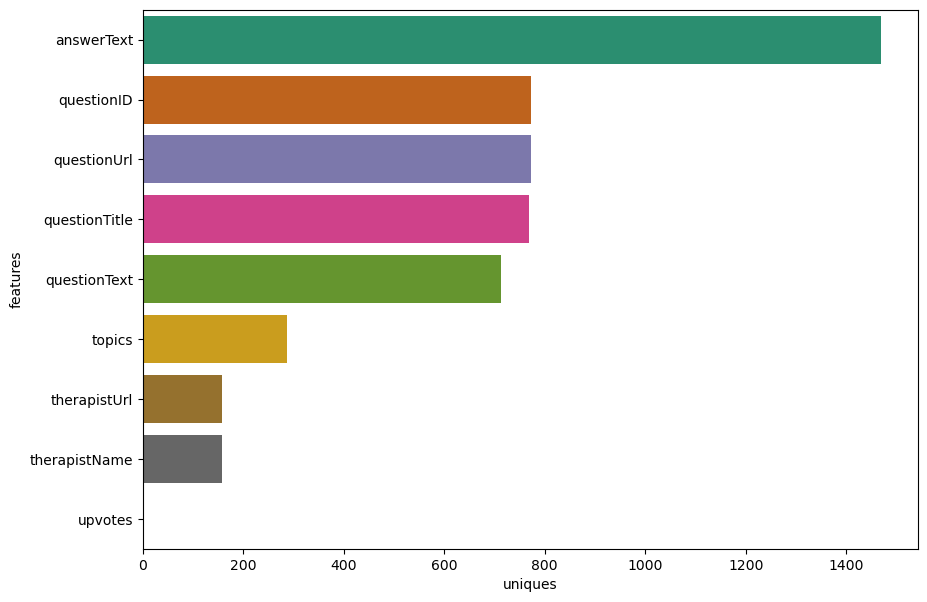

In [ ]:
def unique_features(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['uniques'] = uniques
    return unique_dataframe
features = unique_features(df)
#print(features)
plt.figure(figsize=(10,7))
features = features.sort_values(by='uniques',ascending=False)
sns.barplot(x='uniques',y='features',data=features,palette='Dark2')

# Features


#### Topics

In [ ]:
df.topics.value_counts()


Relationships                                                116
Depression                                                    68
Anxiety                                                       46
Counseling Fundamentals                                       39
Family Conflict                                               37
                                                            ... 
Relationship Dissolution ,Depression,Social Relationships      1
LGBTQ,Relationships,Intimacy                                   1
Marriage,Social Relationships,Intimacy                         1
Anger Management,Social Relationships,Relationships            1
Relationships,Depression,Substance Abuse                       1
Name: topics, Length: 288, dtype: int64

In [ ]:
pd.set_option("display.max_columns", None)
plt.style.use("default")
CBLUEBG = "\33[44m"
CEND = "\33[0m"
print(f"Unique Values in {CBLUEBG} topic {CEND}: {df['topics'].nunique()}")


Unique Values in  topic : 288


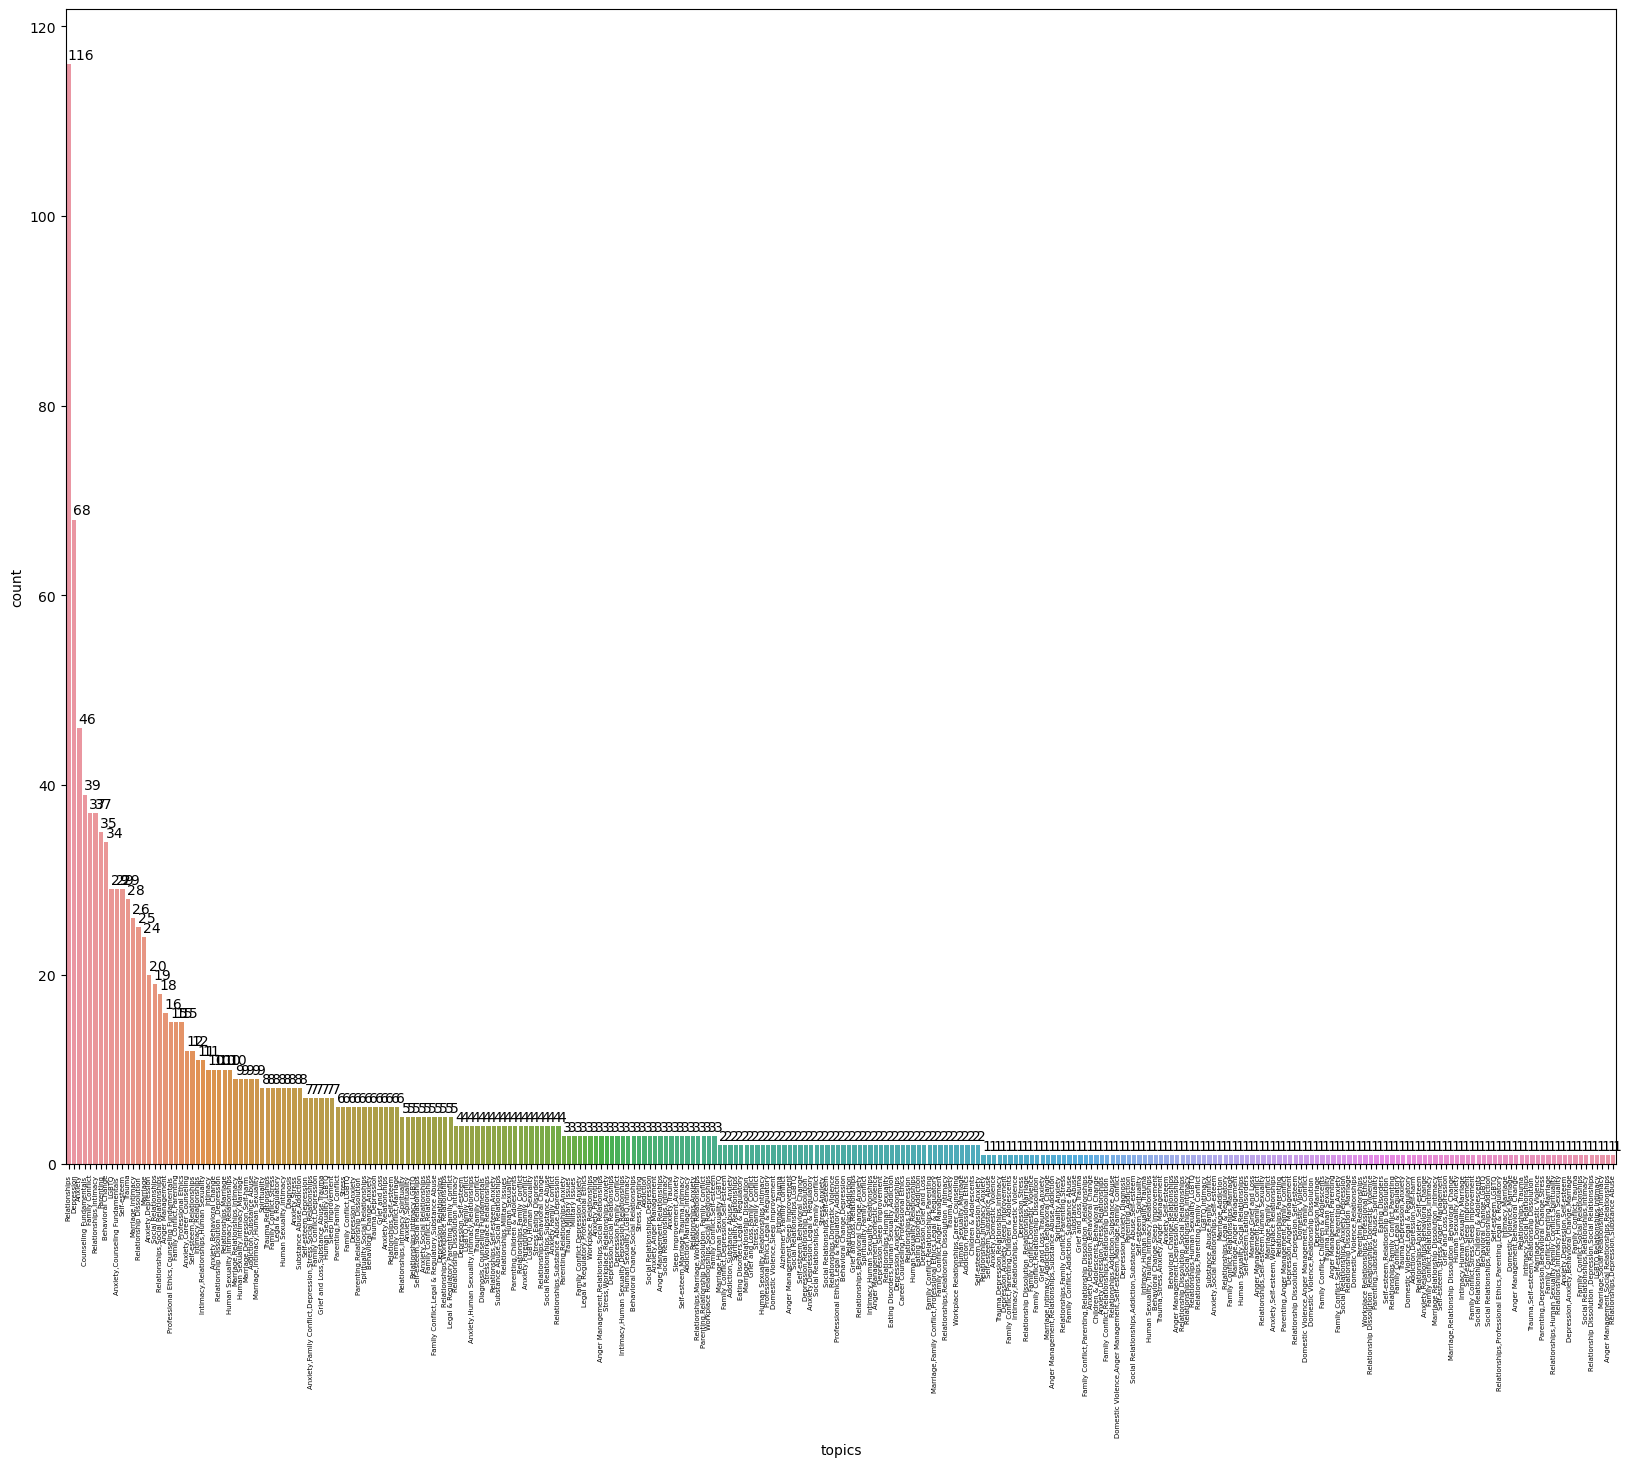

In [ ]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90, fontsize='5')
ax = sns.countplot(x=df["topics"],  data=df, order = df["topics"].value_counts().index )
for p, label in zip(ax.patches, df["topics"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

#### upvotes

In [ ]:
df["upvotes"].value_counts()

0    1472
Name: upvotes, dtype: int64

Text(0.5, 1.0, 'Count of ')

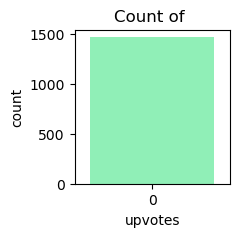

In [ ]:
plt.figure(figsize=(2,2))
sns.countplot(x='upvotes',data=df, palette='rainbow')
plt.title("Count of ")

In [ ]:
#drop upvotes column
df = df.drop(["upvotes"], axis=1)

#### questionID

In [ ]:
print(f"Unique Values in {CBLUEBG} questionID {CEND}: {df['questionID'].nunique()}")


Unique Values in  questionID : 773


#### answerText

In [ ]:
temp1 = df.groupby('topics').count()['answerText'].reset_index().sort_values(by='answerText',ascending=False)
temp1 = pd.DataFrame(temp1)
temp1.columns = ['topics','answerText']
temp1.style.background_gradient(cmap='Purples')

,topics,answerText
192,Relationships,116
54,Depression,68
18,Anxiety,46
53,Counseling Fundamentals,39
208,"Relationships,Intimacy",37
84,Family Conflict,37
168,Parenting,35
43,Behavioral Change,34
229,Self-esteem,29
142,LGBTQ,29


In [ ]:
fig = px.treemap(temp1, path=['topics'], values='answerText',title='Number of Answers by Topic')
fig.show()

#### questionText

In [ ]:
temp2 = df.groupby('topics').count()['questionText'].reset_index().sort_values(by='questionText',ascending=False)
temp2 = pd.DataFrame(temp2)
temp2.columns = ['topics','questionText']
temp2.style.background_gradient(cmap='Purples')

,topics,questionText
192,Relationships,110
54,Depression,65
18,Anxiety,45
53,Counseling Fundamentals,39
84,Family Conflict,36
208,"Relationships,Intimacy",36
168,Parenting,32
22,"Anxiety,Counseling Fundamentals",29
43,Behavioral Change,29
229,Self-esteem,27


In [ ]:
fig = px.treemap(temp2, path=['topics','questionText'], values='questionText',title='Number of Questions by Topic')
fig.show()

In [ ]:
df

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...
...,...,...,...,...,...,...,...,...
1477,56d2f2aa9471b0b41ec68e4d,Is it healthy to embarrass a child as punishment?,My grandson's step-mother sends him to school ...,https://counselchat.com/questions/is-it-health...,"Parenting,Family Conflict",Candice Lawhorn,https://counselchat.com/therapists/candice-law...,<p>Absolutely not!&nbsp;</p><p>It is never in ...
1478,5797a411b43cd7825e26e246,How do I fix my relationship?,My boyfriend is in recovery from drug addictio...,https://counselchat.com/questions/how-do-i-fix...,"Relationships,Addiction","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>I'm sorry you have tension between you and ...
1479,5796a111bc069dff6a5339ca,What are the long term effects of losing one's...,The birth mother attempted suicide several tim...,https://counselchat.com/questions/what-are-the...,"Family Conflict,Parenting,Children & Adolescents","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,"<p>The true answer is, ""no one can really say ..."
1480,5795952cbc069dff6a5339aa,How do I help my 20 year old boyfriend who say...,I think adult life is making him depressed and...,https://counselchat.com/questions/how-do-i-hel...,"Relationships,Depression,Substance Abuse","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>How do you help yourself to believe you req...


#  Data Cleaning
###### 1. Clear of HTML characters
###### 2. Removing URLs, Hashtags and Styles
###### 3. Contraction Replacement
###### 4. Split attached word
###### 5. Normalize text
###### 6. Slang lookup
###### 7. Standardizing and Spell Check
###### 8. Remove Stopwords
###### 9. Remove Punctuations

In [ ]:
import re
from cleantext import clean
from nltk.corpus import stopwords
import itertools
from autocorrect import Speller
from html.parser import HTMLParser
Apos_dict={"'s":" is","n't":" not","'m":" am","'ll":" will","'d":" would","'ve":" have","'re":" are"}
#file = open("C:/Users/Pctec/Download/slang.txt", "r")
#slang=file.read()
def clean_data(text):
    text = HTMLParser().unescape(str(text))
    text = re.sub(r"#", "", str(text))
    text = re.sub(r"^RT[\s]+", "", str(text))
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(text))
    for key,value in Apos_dict.items():
        if key in text:
            text=text.replace(key,value)
    text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",str(text)) if s])
    text = str(text).lower()
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(str(text)))
    spell = Speller(lang='en')
    text=spell(str(text))

    return text
round1 = lambda x: clean_data(x)

In [ ]:
df['questionText'] = df['questionText'].apply(lambda x:clean_data(x))


C:\Users\Pctec\AppData\Local\Temp\ipykernel_19232\1812922893.py:11: DeprecationWarning:

The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.



In [ ]:
df['answerText'] = df['answerText'].apply(lambda x:clean_data(x))


C:\Users\Pctec\AppData\Local\Temp\ipykernel_19232\1812922893.py:11: DeprecationWarning:

The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.



In [ ]:
df

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,my wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,p what you are describing is something psychol...
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,im planning to have baby so i have to quit sm...,https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,p hi good for you in planning ahead to do wha...
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,i have secrets in my mind and i dont know what...,https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,p it sounds like keeping the secrets has becom...
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,i am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,p hi there its great you are able to realize ...
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,i had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,p you didnt say what or how many medications y...
...,...,...,...,...,...,...,...,...
1477,56d2f2aa9471b0b41ec68e4d,Is it healthy to embarrass a child as punishment?,my grandsons stepmother sends him to school wi...,https://counselchat.com/questions/is-it-health...,"Parenting,Family Conflict",Candice Lawhorn,https://counselchat.com/therapists/candice-law...,p absolutely nopp it is never in a child best ...
1478,5797a411b43cd7825e26e246,How do I fix my relationship?,my boyfriend is in recovery from drug addictio...,https://counselchat.com/questions/how-do-i-fix...,"Relationships,Addiction","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,p im sorry you have tension between you and yo...
1479,5796a111bc069dff6a5339ca,What are the long term effects of losing one's...,the birth mother attempted suicide several tim...,https://counselchat.com/questions/what-are-the...,"Family Conflict,Parenting,Children & Adolescents","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,p the true answer is no one can really say wit...
1480,5795952cbc069dff6a5339aa,How do I help my 20 year old boyfriend who say...,i think adult life is making him depressed and...,https://counselchat.com/questions/how-do-i-hel...,"Relationships,Depression,Substance Abuse","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,p how do you help yourself to believe you requ...


In [ ]:
df1 = df.copy()

###### 10.Tokenization

In [ ]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['questionText']=df['questionText'].apply(regexp.tokenize)
df.head(3)

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,"[my, wife, and, mother, are, having, tense, di...",https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,p what you are describing is something psychol...
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"[im, planning, to, have, baby, so, i, have, to...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,p hi good for you in planning ahead to do wha...
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"[i, have, secrets, in, my, mind, and, i, dont,...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,p it sounds like keeping the secrets has becom...


In [ ]:
df['answerText']=df['answerText'].apply(regexp.tokenize)

##### 11.Remove stop words

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['ect','the','a']
stopwords.extend(my_stopwords)
df['questionText'] = df['questionText'].apply(lambda x: [item for item in x if item not in stopwords])
df['answerText'] = df['answerText'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pctec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,"[wife, mother, tense, disagreements, past, the...",https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,"[p, describing, something, psychologists, term..."
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"[im, planning, baby, quit, smoking, hard, some...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,"[p, hi, good, planning, ahead, whats, wealthie..."
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"[secrets, mind, dont, know, dont, want, tell, ...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,"[p, sounds, like, keeping, secrets, become, pr..."


In [ ]:
#keep only words which are longer than 2 letters
df['Text_string_questionText'] = df['questionText'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
all_words = ' '.join([word for word in df['Text_string_questionText']])
nltk.download('punkt')
tokenized_words = nltk.tokenize.word_tokenize(all_words)
df.head(3)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pctec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,Text_string_questionText
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,"[wife, mother, tense, disagreements, past, the...",https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,"[p, describing, something, psychologists, term...",wife mother tense disagreements past theyre mi...
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"[im, planning, baby, quit, smoking, hard, some...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,"[p, hi, good, planning, ahead, whats, wealthie...",planning baby quit smoking hard sometimes phys...
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"[secrets, mind, dont, know, dont, want, tell, ...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,"[p, sounds, like, keeping, secrets, become, pr...",secrets mind dont know dont want tell wife mom...


In [ ]:
#keep only words which are longer than 2 letters
df['Text_string_answerText'] = df['answerText'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
all_words = ' '.join([word for word in df['Text_string_answerText']])
nltk.download('punkt')
tokenized_words = nltk.tokenize.word_tokenize(all_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pctec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### 13.Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

wordnet_lem = WordNetLemmatizer()
df['Text_string_questionText'] = df['Text_string_questionText'].apply(wordnet_lem.lemmatize)
df['Text_string_answerText'] = df['Text_string_answerText'].apply(wordnet_lem.lemmatize)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pctec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Pctec\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df


,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,Text_string_questionText,Text_string_answerText
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,"[wife, mother, tense, disagreements, past, the...",https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,"[p, describing, something, psychologists, term...",wife mother tense disagreements past theyre mi...,describing something psychologists termed tria...
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"[im, planning, baby, quit, smoking, hard, some...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,"[p, hi, good, planning, ahead, whats, wealthie...",planning baby quit smoking hard sometimes phys...,good planning ahead whats wealthiest baby that...
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"[secrets, mind, dont, know, dont, want, tell, ...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,"[p, sounds, like, keeping, secrets, become, pr...",secrets mind dont know dont want tell wife mom...,sounds like keeping secrets become problem sev...
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,"[extremely, possessive, relationships, hurting...",https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,"[p, hi, great, able, realize, issues, going, s...",extremely possessive relationships hurting fri...,great able realize issues going someone feels ...
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,"[head, injury, years, ago, mind, races, time, ...",https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,"[p, didnt, say, many, medications, youve, trie...",head injury years ago mind races time trouble ...,didnt say many medications youve tried certain...
...,...,...,...,...,...,...,...,...,...,...
1477,56d2f2aa9471b0b41ec68e4d,Is it healthy to embarrass a child as punishment?,"[grandsons, stepmother, sends, school, pink, b...",https://counselchat.com/questions/is-it-health...,"Parenting,Family Conflict",Candice Lawhorn,https://counselchat.com/therapists/candice-law...,"[p, absolutely, nopp, never, child, best, inte...",grandsons stepmother sends school pink bare ba...,absolutely nopp never child best interest use ...
1478,5797a411b43cd7825e26e246,How do I fix my relationship?,"[boyfriend, recovery, drug, addiction, recentl...",https://counselchat.com/questions/how-do-i-fix...,"Relationships,Addiction","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,"[p, im, sorry, tension, bpp, relationship, mea...",boyfriend recovery drug addiction recently got...,sorry tension bpp relationship means two peopl...
1479,5796a111bc069dff6a5339ca,What are the long term effects of losing one's...,"[birth, mother, attempted, suicide, several, t...",https://counselchat.com/questions/what-are-the...,"Family Conflict,Parenting,Children & Adolescents","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,"[p, true, answer, one, really, say, certainty,...",birth mother attempted suicide several times p...,true answer one really say certainty variables...
1480,5795952cbc069dff6a5339aa,How do I help my 20 year old boyfriend who say...,"[think, adult, life, making, depressed, often,...",https://counselchat.com/questions/how-do-i-hel...,"Relationships,Depression,Substance Abuse","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,"[p, help, believe, require, offers, get, relat...",think adult life making depressed often sleep ...,help believe require offers get relationship f...


(-0.5, 599.5, 399.5, -0.5)

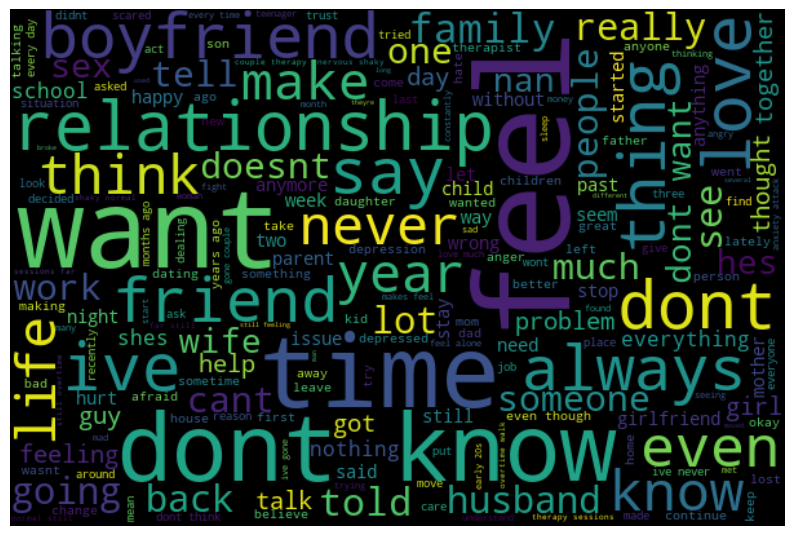

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud
all_words_lem = ' '.join([word for word in df['Text_string_questionText']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

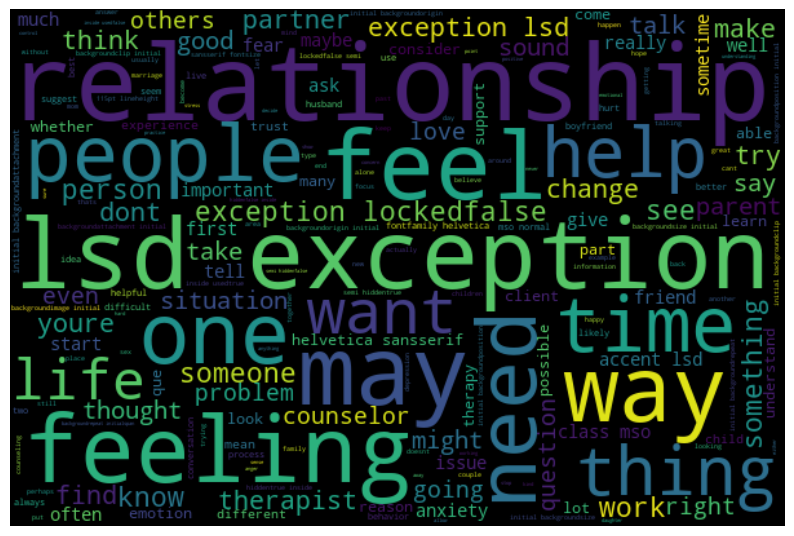

In [ ]:
all_words_lem = ' '.join([word for word in df['Text_string_answerText']])

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')